In [1]:
import tensorflow as tf

In [2]:
# Install a temporary patch to enable a few extra TF 2.0 upgrades. This piece will be removed soon.

from tensorflow.python.ops import control_flow_util
control_flow_util.ENABLE_CONTROL_FLOW_V2 = True

In [3]:
# Google 推薦使用的建模方式 - Functional API

# 載入資料集 [I]
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 載入資料集 [II]
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

print(type(mnist))
mnist.train.images
mnist.train.num_examples
mnist.test.num_examples
mnist.validation.num_examples

mnist.train.images[1].shape
plt.imshow(mnist.train.images[1].reshape(28,28))

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

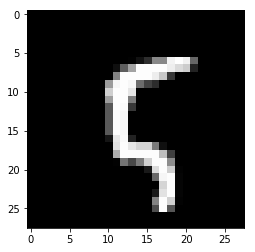

In [21]:
plt.imshow(x_train[100],cmap='gist_gray')

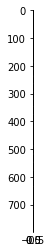

In [25]:
# plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)
plt.imshow(x_train[100].reshape(784,1), cmap='gist_gray')

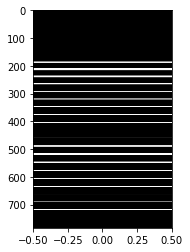

In [30]:
plt.imshow(x_train[100].reshape(784,1), cmap='gist_gray', aspect=0.002)

In [31]:
x_train, x_test = x_train / 255., x_test / 255.

In [36]:
epochs = 10

In [38]:
# Using Keras as Functional API

inputs = tf.keras.Input((28, 28))   # Returns a placeholder tensor

x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(512, activation='relu', name='d1')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='d2')(x)

In [39]:
model = tf.keras.Model(inputs = inputs, outputs = outputs)

In [40]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
d1 (Dense)                   (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
d2 (Dense)                   (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [41]:
optimizer = tf.keras.optimizers.Adam()

In [42]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train, batch_size=32, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.2165 - accuracy: 0.9348
Epoch 2/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0952 - accuracy: 0.9703
Epoch 3/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0704 - accuracy: 0.9777
Epoch 4/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0535 - accuracy: 0.9834
Epoch 5/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0425 - accuracy: 0.9857
Epoch 6/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0367 - accuracy: 0.9882
Epoch 7/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.0323 - accuracy: 0.9895
Epoch 8/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0270 - accuracy: 0.9909
Epoch 9/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0228 - accuracy: 0.9924
Epoch 10/10
60000/6

In [44]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 142us/sample - loss: 0.0717 - accuracy: 0.9816


[0.07168776405905046, 0.9816]